In [1]:
import matplotlib
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", family="serif")
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import h5py
import sys
sys.path.append('.')
from datalib import Data, flag_to_species
from scipy.ndimage import gaussian_filter1d

In [2]:
data = Data('../problems/two_stream/bin/Data/')
print(data.conf)
print(data.fld_steps[-1])

fld keys are: ['B1', 'B2', 'B3', 'B_sqr', 'E1', 'E2', 'E3', 'E_sqr', 'J1', 'J2', 'J3', 'Rho_e', 'Rho_p', 'divB', 'divE', 'flux', 'flux_e1', 'flux_e2', 'flux_e3', 'flux_e4', 'flux_p1', 'flux_p2', 'flux_p3', 'flux_p4', 'step', 'stress_e1', 'stress_e10', 'stress_e2', 'stress_e3', 'stress_e4', 'stress_e5', 'stress_e6', 'stress_e7', 'stress_e8', 'stress_e9', 'stress_p1', 'stress_p10', 'stress_p2', 'stress_p3', 'stress_p4', 'stress_p5', 'stress_p6', 'stress_p7', 'stress_p8', 'stress_p9', 'time', 'B', 'J']
ptc keys are: ['step', 'time', 'tracked_ptc_E', 'tracked_ptc_flag', 'tracked_ptc_id', 'tracked_ptc_p1', 'tracked_ptc_p2', 'tracked_ptc_p3', 'tracked_ptc_weight', 'tracked_ptc_x1', 'tracked_ptc_x2', 'tracked_ptc_x3']
{'log_level': 0, 'num_species': 2, 'ion_mass': 1.0, 'max_ptc_num': 1000000, 'max_ph_num': 1000, 'ptc_buffer_size': 500000, 'ptc_segment_size': 100000, 'max_tracked_num': 1000000, 'dt': 0.001, 'q_e': 1.0, 'current_smoothing': 1, 'use_pml': True, 'max_steps': 5000, 'fld_output_int

fld keys are: ['B1', 'B2', 'B3', 'B_sqr', 'E1', 'E2', 'E3', 'E_sqr', 'J1', 'J2', 'J3', 'Rho_e', 'Rho_p', 'divB', 'divE', 'flux', 'flux_e1', 'flux_e2', 'flux_e3', 'flux_e4', 'flux_p1', 'flux_p2', 'flux_p3', 'flux_p4', 'step', 'stress_e1', 'stress_e10', 'stress_e2', 'stress_e3', 'stress_e4', 'stress_e5', 'stress_e6', 'stress_e7', 'stress_e8', 'stress_e9', 'stress_p1', 'stress_p10', 'stress_p2', 'stress_p3', 'stress_p4', 'stress_p5', 'stress_p6', 'stress_p7', 'stress_p8', 'stress_p9', 'time', 'B', 'J']
ptc keys are: ['step', 'time', 'tracked_ptc_E', 'tracked_ptc_flag', 'tracked_ptc_id', 'tracked_ptc_p1', 'tracked_ptc_p2', 'tracked_ptc_p3', 'tracked_ptc_weight', 'tracked_ptc_x1', 'tracked_ptc_x2', 'tracked_ptc_x3']
1.9999999999998905
(164592,)
[0.42229596 0.42565385 0.42936137 ... 1.1586769  1.3505862  1.8722923 ]


Text(0, 0.5, '$y$')

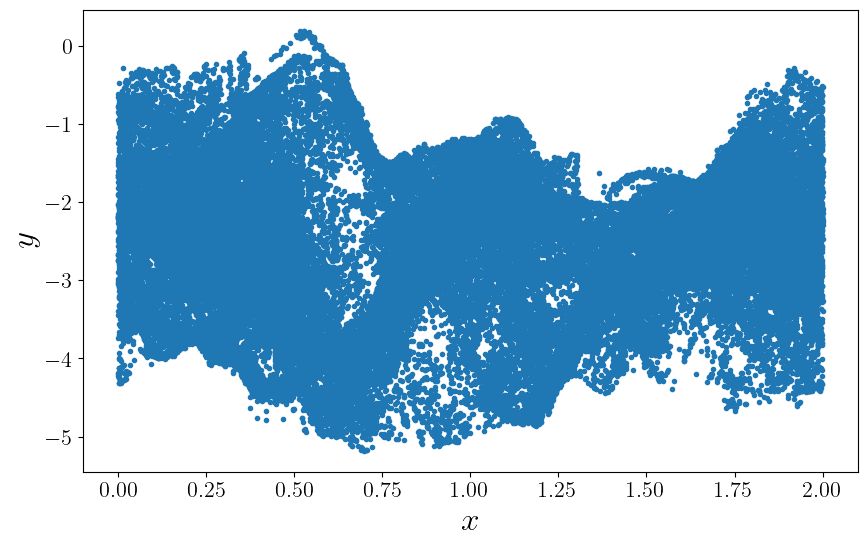

In [3]:
data.reload()
# step = data.ptc_steps[-1]
step = 40
data.load(step)
print(data.time)

tick_size = 16
label_size = 24

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10.0, 6.0)
fig.patch.set_facecolor('w')

print(data.tracked_ptc_p1.shape)
e_x1 = data.tracked_ptc_x1[flag_to_species(data.tracked_ptc_flag) == 0]
e_p1 = data.tracked_ptc_p1[flag_to_species(data.tracked_ptc_flag) == 0]
p_x1 = data.tracked_ptc_x1[flag_to_species(data.tracked_ptc_flag) == 1]
p_p1 = data.tracked_ptc_p1[flag_to_species(data.tracked_ptc_flag) == 1]
print(e_x1)
ax.plot(e_x1, e_p1, '.')

ax.tick_params(labelsize=tick_size)
ax.set_xlabel(r'$x$', fontsize=label_size)
ax.set_ylabel(r'$y$', fontsize=label_size)

fld keys are: ['B1', 'B2', 'B3', 'B_sqr', 'E1', 'E2', 'E3', 'E_sqr', 'J1', 'J2', 'J3', 'Rho_e', 'Rho_p', 'divB', 'divE', 'flux', 'step', 'time', 'B', 'J']
0.0
[[0.35777086 0.35777086 0.35777086 ... 0.35777086 0.35777086 0.35777086]
 [0.35777086 0.35777086 0.35777086 ... 0.35777086 0.35777086 0.35777086]
 [0.35777086 0.35777086 0.35777086 ... 0.35777086 0.35777086 0.35777086]
 ...
 [0.35777086 0.35777086 0.35777086 ... 0.35777086 0.35777086 0.35777086]
 [0.35777086 0.35777086 0.35777086 ... 0.35777086 0.35777086 0.35777086]
 [0.35777086 0.35777086 0.35777086 ... 0.35777086 0.35777086 0.35777086]]


Text(0, 0.5, '$y$')

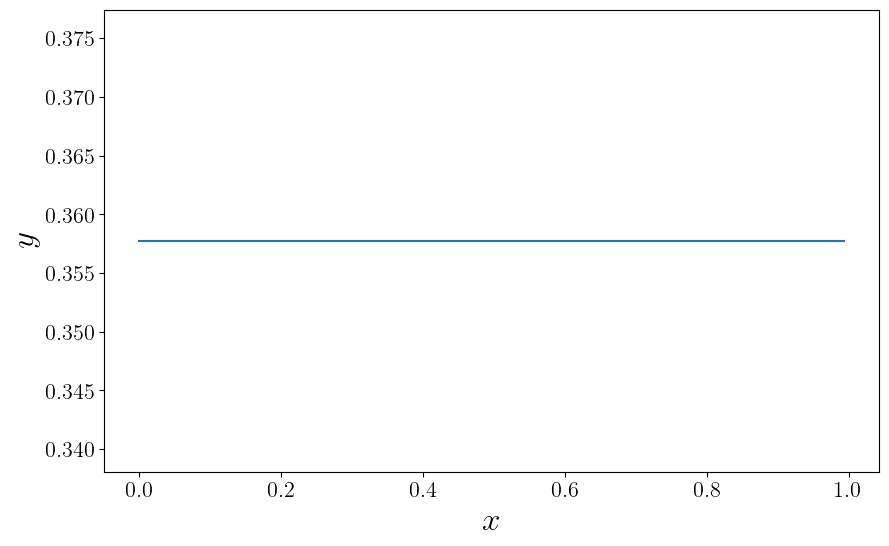

In [49]:
data.reload()
# step = data.fld_steps[-1]
step = 0
data.load(step)
print(data.time)

tick_size = 16
label_size = 24


fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10.0, 6.0)
fig.patch.set_facecolor('w')

ax.plot(data.x1[0,:], data.E1[10,:])
# ax.set_ylim(-1e-8,1e-8)
print(data.E1)

ax.tick_params(labelsize=tick_size)
ax.set_xlabel(r'$x$', fontsize=label_size)
ax.set_ylabel(r'$y$', fontsize=label_size)


[[-0.24653125  1.3617343  -0.3547712  ... -0.7370856  -1.3403108
   1.3136592 ]
 [ 1.0287335  -0.05824775 -1.586889   ... -0.64632773  0.23897481
  -1.3314235 ]
 [ 0.3503623  -0.23940277  0.071078   ...  0.41983804 -0.8389189
  -1.3383605 ]
 ...
 [-2.320027    0.93440676 -0.34077597 ... -0.63741666  0.17713594
   0.9321847 ]
 [-0.47536206 -0.80569506  0.9662801  ...  0.7540032  -0.30540538
   0.01354861]
 [ 1.0770698  -1.0959953   1.0951974  ...  0.25211358 -0.26919925
  -0.79498076]]


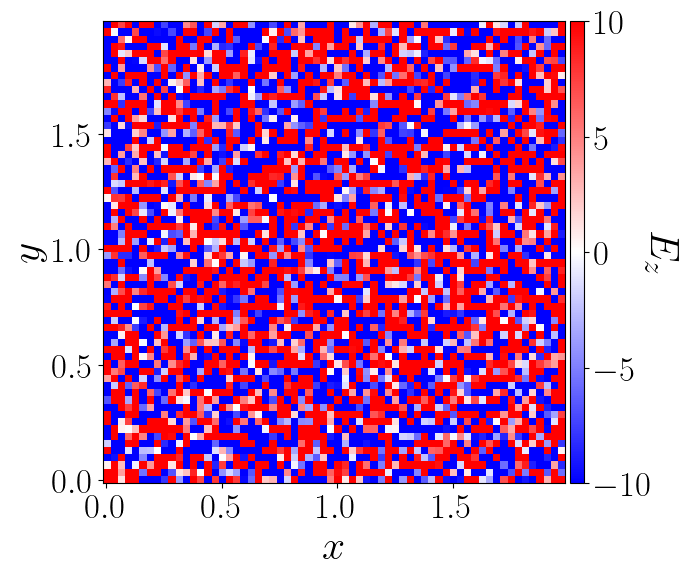

In [159]:
step = 23
data.load(step)

tick_size = 25
label_size = 30

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10.0, 6.0)
fig.patch.set_facecolor('w')

x = data.x1
y = data.x2

# mesh_rho = ax.pcolormesh(data.x1, data.x2, data.sync_loss / rho, norm=colors.LogNorm(vmin=0.01, vmax=5e3),
mesh_rho = ax.pcolormesh(x, y, data.Rho_e + 200.0,
# mesh_rho = ax.pcolormesh(x, y, data.E1,
                         vmin=-10, vmax=10,
#                          norm=colors.LogNorm(vmin=0.01, vmax=5e3),
                        #  norm=colors.SymLogNorm(vmin=-100, vmax=100, linthresh=1e-4),
#                          shading='gouraud', cmap='inferno')
                         cmap='bwr')
# mesh_rho = ax.pcolormesh(x, y, data.E3 / data.B1, vmin=-0.2, vmax=0.2, shading='gouraud')
ax.set_aspect('equal')
ax.tick_params(labelsize=tick_size)
ax.set_xlabel(r'$x$', fontsize=label_size)
ax.set_ylabel(r'$y$', fontsize=label_size)

divider1 = make_axes_locatable(ax)
cax1 = divider1.append_axes("right", size="3%", pad=0.05)
cb1 = plt.colorbar(mesh_rho, cax=cax1)
cb1.ax.tick_params(labelsize=tick_size)
cb1.ax.set_ylabel('$E_z$', fontsize=label_size, rotation=270, labelpad=20)

print(data.E2)